# Economic Data Analysis using FRED API
# **Pull the data from FRED API and Perform EDA (Exploratory Data Analysis) !!**

FRED api python package is not available by defauly in kaggle notebook. so we insatall first fredapi and then use it

In [6]:
!pip install fredapi

In [7]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px #

plt.style.use('fivethirtyeight') #default ploting style
pd.set_option('display.max_columns', 500) #to see all the column in dataframe
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"] #list of color for visualization


from fredapi import Fred 

#fred_key = "api-k"

# i already store my api key in kaggle secrets so to use it below code
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("fred-api")

# Pull the data from Fred api

In [8]:
fred = Fred(api_key=secret_value_0) #object
sp_search = fred.search('S&P',order_by='popularity') # search data

In [9]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-25,2023-08-25,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-24,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-25 09:02:07-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-25,2023-08-25,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-25,2023-08-25,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-24,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-25 09:02:11-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-08-25,2023-08-25,S&P 500,2013-08-26,2023-08-25,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-25 19:11:01-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-25,2023-08-25,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


<Axes: title={'center': 'S&P 500'}>

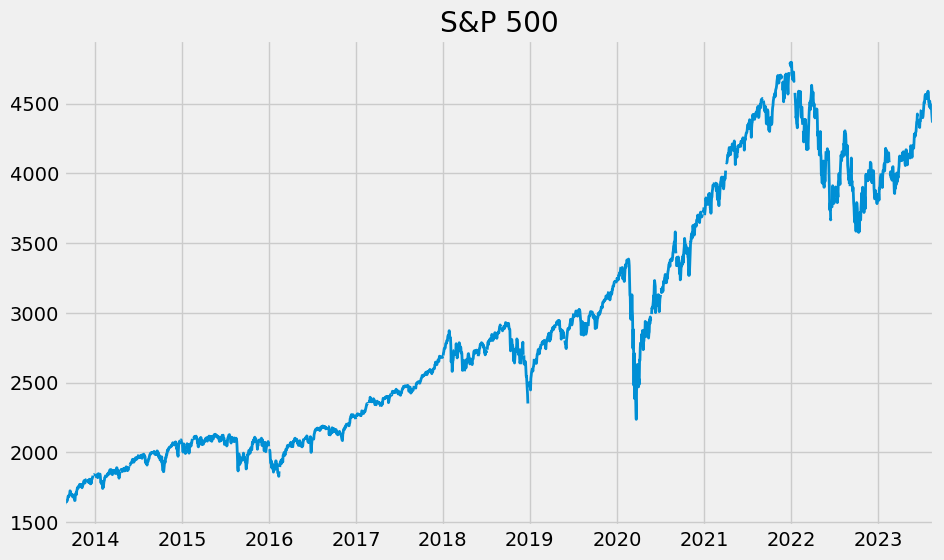

In [10]:
# pull the row data & plot
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,6), title = 'S&P 500', lw=2)

# Pull and Join Multiple Data series

Pull the data of unemployment rate state apply filter the dataset based on seasonal_adjustment, units and frequency

In [52]:
df_unemp = fred.search('unemployment rate state', filter=('frequency','Monthly'))
df_unemp = df_unemp.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
# search when only unemployment rate in title
df_unemp = df_unemp.loc[df_unemp['title'].str.contains('Unemployment Rate')]

In [53]:
df_unemp

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-25,2023-08-25,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,92,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-25,2023-08-25,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-08-25,2023-08-25,Unemployment Rate in California,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:44:02-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-08-25,2023-08-25,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,49,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-08-25,2023-08-25,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,13,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNERUR,CNERUR,2023-08-25,2023-08-25,Unemployment Rate in Northeast Census Region,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:44:17-05:00,2,None
LNS14000048,LNS14000048,2023-08-25,2023-08-25,Unemployment Rate - 25 Yrs. & over,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:40-05:00,3,The series comes from the 'Current Population ...
CWSTUR,CWSTUR,2023-08-25,2023-08-25,Unemployment Rate in West Census Region,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:43:06-05:00,3,None


**visit each id and pull the series data down and store in list**

In [54]:
all_result =[]

for id in df_unemp.index:
    result = fred.get_series(id)
    result = result.to_frame(name = id)
    all_result.append(result)

In [55]:
#concate list into dataframe (now some of this dont have the value for same date so it fill with Nan value) and drop unwanted column
unemp_result = pd.concat(all_result, axis=1).drop(['LNS14000006','M0892AUSM156SNBR','M0892BUSM156SNBR','LNS14000031','LNS14000024','LNS14000002',
                                    'LNS14000009','LNS14024887','LNS14000003','LNS14027660','LRUN64TTUSM156S','LNS14000001',
                                    'LNS14027662','LNS14032183','LNS14000012','LNS14000018','LNS14027659',
                                   'LASMT261982000000003','LNS14000060','LNS14000036','LASMT391746000000003',
                                   'LNS14000028','LRHUTTTTUSM156S','LRUNTTTTUSM156S','LNS14000025','LNS14000089','LNS14000032',
                                    'LNS14024230','LNS14027689','LRUN24TTUSM156S','LNS14000026','LNS14000315','LNS14000048',
                                   'LRUN25TTUSM156S','LNS14000029','U2RATE','CSOUUR','CNEWUR','USAURAMS','CNERUR','CWSTUR' ],axis=1)

 

In [56]:
unemp_state = unemp_result.drop('UNRATE',axis=1) #only state wise unemployment rate

In [57]:
unemp_state

,CAUR,TXUR,FLUR,NYUR,OHUR,MIUR,NCUR,ILUR,COUR,PAUR,ALUR,TNUR,GAUR,MAUR,NJUR,SCUR,WIUR,AZUR,VAUR,INUR,KYUR,NVUR,WAUR,ARUR,LAUR,MDUR,WVUR,ORUR,MOUR,NMUR,MNUR,UTUR,IAUR,MTUR,NDUR,AKUR,MSUR,DCUR,OKUR,CTUR,PRUR,RIUR,KSUR,NEUR,MEUR,HIUR,SDUR,DEUR,IDUR,NHUR,VTUR,CMWRUR,WYUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,4.0,2.6,4.1,3.8,4.1,3.5,4.4,2.8,4.2,2.3,3.4,3.1,3.5,3.5,3.2,2.5,3.5,3.2,3.1,3.8,5.5,4.5,3.0,3.6,2.7,3.4,4.4,2.5,3.5,2.8,2.4,2.8,2.3,2.1,3.7,3.5,4.8,3.0,3.9,6.0,3.1,2.9,2.1,2.6,3.5,1.9,4.4,2.6,2.4,2.7,3.4,3.7
2023-04-01,4.5,4.0,2.6,4.0,3.7,3.8,3.4,4.2,2.8,4.1,2.2,3.3,3.1,3.1,3.5,3.1,2.4,3.4,3.1,3.0,3.7,5.4,4.3,2.8,3.6,2.5,3.3,4.0,2.5,3.5,2.8,2.3,2.7,2.3,2.1,3.7,3.4,5.0,2.9,3.8,6.0,3.0,2.9,2.0,2.4,3.3,1.9,4.3,2.6,2.1,2.4,3.3,3.5
2023-05-01,4.5,4.1,2.6,3.9,3.6,3.7,3.4,4.1,2.8,4.0,2.2,3.3,3.2,2.8,3.6,3.1,2.4,3.4,2.9,3.1,3.8,5.4,4.1,2.7,3.6,2.4,3.3,3.7,2.5,3.5,2.9,2.3,2.7,2.3,2.1,3.6,3.2,5.1,2.8,3.7,6.1,3.0,2.9,1.9,2.4,3.1,1.9,4.2,2.6,1.9,2.1,3.2,3.3
2023-06-01,4.6,4.1,2.6,3.9,3.4,3.6,3.3,4.0,2.8,3.8,2.2,3.2,3.2,2.6,3.7,3.1,2.5,3.5,2.7,3.2,3.8,5.4,3.8,2.6,3.6,2.0,3.3,3.5,2.6,3.5,2.9,2.4,2.7,2.4,2.0,3.7,3.1,5.1,2.7,3.7,6.1,2.9,2.8,1.9,2.4,3.0,1.8,4.2,2.7,1.8,1.9,3.2,3.1


Check for null value

In [58]:
unemp_state.isna().sum(axis=1) # this will tell us how many null value in each date

1929-04-01    53
1929-05-01    53
1929-06-01    53
1929-07-01    53
1929-08-01    53
              ..
2023-03-01     0
2023-04-01     0
2023-05-01     0
2023-06-01     0
2023-07-01     0
Length: 1120, dtype: int64

<Axes: >

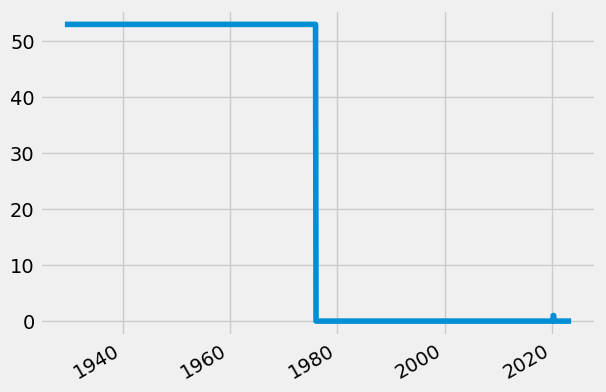

In [59]:
unemp_state.isna().sum(axis=1).plot()

This are the date when they prior to provide monthly unemployment rate for state now we remove it.

In [60]:
unemp_state = unemp_state.dropna()

In [61]:
unemp_state

,CAUR,TXUR,FLUR,NYUR,OHUR,MIUR,NCUR,ILUR,COUR,PAUR,ALUR,TNUR,GAUR,MAUR,NJUR,SCUR,WIUR,AZUR,VAUR,INUR,KYUR,NVUR,WAUR,ARUR,LAUR,MDUR,WVUR,ORUR,MOUR,NMUR,MNUR,UTUR,IAUR,MTUR,NDUR,AKUR,MSUR,DCUR,OKUR,CTUR,PRUR,RIUR,KSUR,NEUR,MEUR,HIUR,SDUR,DEUR,IDUR,NHUR,VTUR,CMWRUR,WYUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,9.9,6.4,6.6,5.8,8.0,6.6,6.0,8.4,10.5,10.3,7.4,5.8,10.2,6.1,6.6,5.6,9.2,8.5,7.3,6.3,6.4,7.5,9.5,5.9,8.6,6.0,5.8,4.3,5.8,3.4,7.1,6.7,8.7,5.8,9.8,19.6,7.8,4.2,3.3,8.7,9.8,3.3,8.0,5.6,6.5,8.6,6.8,4.1
1976-02-01,9.2,5.8,9.7,10.3,8.1,9.9,6.4,6.6,5.7,8.1,6.6,6.0,8.4,10.5,10.3,7.4,5.8,10.2,6.1,6.6,5.6,9.2,8.5,7.3,6.3,6.4,7.5,9.5,5.9,8.7,6.0,5.9,4.3,5.8,3.4,7.1,6.7,8.7,5.8,9.8,19.5,7.8,4.2,3.3,8.7,9.8,3.3,8.0,5.6,6.5,8.6,6.8,4.1
1976-03-01,9.1,5.9,9.6,10.2,8.1,9.9,6.4,6.6,5.7,8.1,6.6,6.0,8.4,10.5,10.3,7.3,5.7,10.1,6.1,6.5,5.6,9.2,8.4,7.3,6.3,6.4,7.5,9.4,5.9,8.7,5.9,5.8,4.3,5.8,3.4,7.0,6.6,8.6,5.8,9.8,19.3,7.7,4.2,3.3,8.6,9.8,3.2,8.0,5.6,6.5,8.6,6.8,4.1
1976-04-01,9.1,5.9,9.5,10.2,8.0,9.8,6.3,6.6,5.6,8.1,6.5,6.0,8.3,10.3,10.3,7.2,5.6,10.0,6.0,6.3,5.6,9.0,8.5,7.2,6.4,6.4,7.5,9.2,6.0,8.6,5.8,5.8,4.2,5.8,3.5,6.9,6.4,8.5,5.8,9.6,19.0,7.7,4.2,3.2,8.6,9.7,3.1,8.1,5.6,6.5,8.6,6.7,4.0
1976-05-01,9.0,5.9,9.3,10.1,7.8,9.6,6.1,6.6,5.6,8.1,6.4,5.9,8.1,10.1,10.3,7.0,5.5,9.8,5.9,6.0,5.5,8.9,8.5,7.1,6.5,6.5,7.4,9.1,6.0,8.6,5.7,5.7,4.1,5.8,3.6,6.9,6.3,8.4,5.7,9.4,18.9,7.7,4.2,3.1,8.5,9.4,3.1,8.3,5.6,6.5,8.5,6.6,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,4.0,2.6,4.1,3.8,4.1,3.5,4.4,2.8,4.2,2.3,3.4,3.1,3.5,3.5,3.2,2.5,3.5,3.2,3.1,3.8,5.5,4.5,3.0,3.6,2.7,3.4,4.4,2.5,3.5,2.8,2.4,2.8,2.3,2.1,3.7,3.5,4.8,3.0,3.9,6.0,3.1,2.9,2.1,2.6,3.5,1.9,4.4,2.6,2.4,2.7,3.4,3.7
2023-04-01,4.5,4.0,2.6,4.0,3.7,3.8,3.4,4.2,2.8,4.1,2.2,3.3,3.1,3.1,3.5,3.1,2.4,3.4,3.1,3.0,3.7,5.4,4.3,2.8,3.6,2.5,3.3,4.0,2.5,3.5,2.8,2.3,2.7,2.3,2.1,3.7,3.4,5.0,2.9,3.8,6.0,3.0,2.9,2.0,2.4,3.3,1.9,4.3,2.6,2.1,2.4,3.3,3.5
2023-05-01,4.5,4.1,2.6,3.9,3.6,3.7,3.4,4.1,2.8,4.0,2.2,3.3,3.2,2.8,3.6,3.1,2.4,3.4,2.9,3.1,3.8,5.4,4.1,2.7,3.6,2.4,3.3,3.7,2.5,3.5,2.9,2.3,2.7,2.3,2.1,3.6,3.2,5.1,2.8,3.7,6.1,3.0,2.9,1.9,2.4,3.1,1.9,4.2,2.6,1.9,2.1,3.2,3.3
2023-06-01,4.6,4.1,2.6,3.9,3.4,3.6,3.3,4.0,2.8,3.8,2.2,3.2,3.2,2.6,3.7,3.1,2.5,3.5,2.7,3.2,3.8,5.4,3.8,2.6,3.6,2.0,3.3,3.5,2.6,3.5,2.9,2.4,2.7,2.4,2.0,3.7,3.1,5.1,2.7,3.7,6.1,2.9,2.8,1.9,2.4,3.0,1.8,4.2,2.7,1.8,1.9,3.2,3.1


Column name is not useful so we are going to chang it

In [62]:
id_to_state = df_unemp['title'].str.replace('Unemployment Rate in ','').to_dict()

this dictonary we mapping to change name above using list comprehension

In [63]:
unemp_state.columns = [id_to_state[d] for d in unemp_state.columns]

# Plot states unemployment rate

In [65]:
px.line(unemp_state)

This is interactive plot. by clicking on legend we can compare multiple state in plot. As you can see in plot in May 2020 unemployment rate is high.

# Pull May 2020 Unemployment rate per state

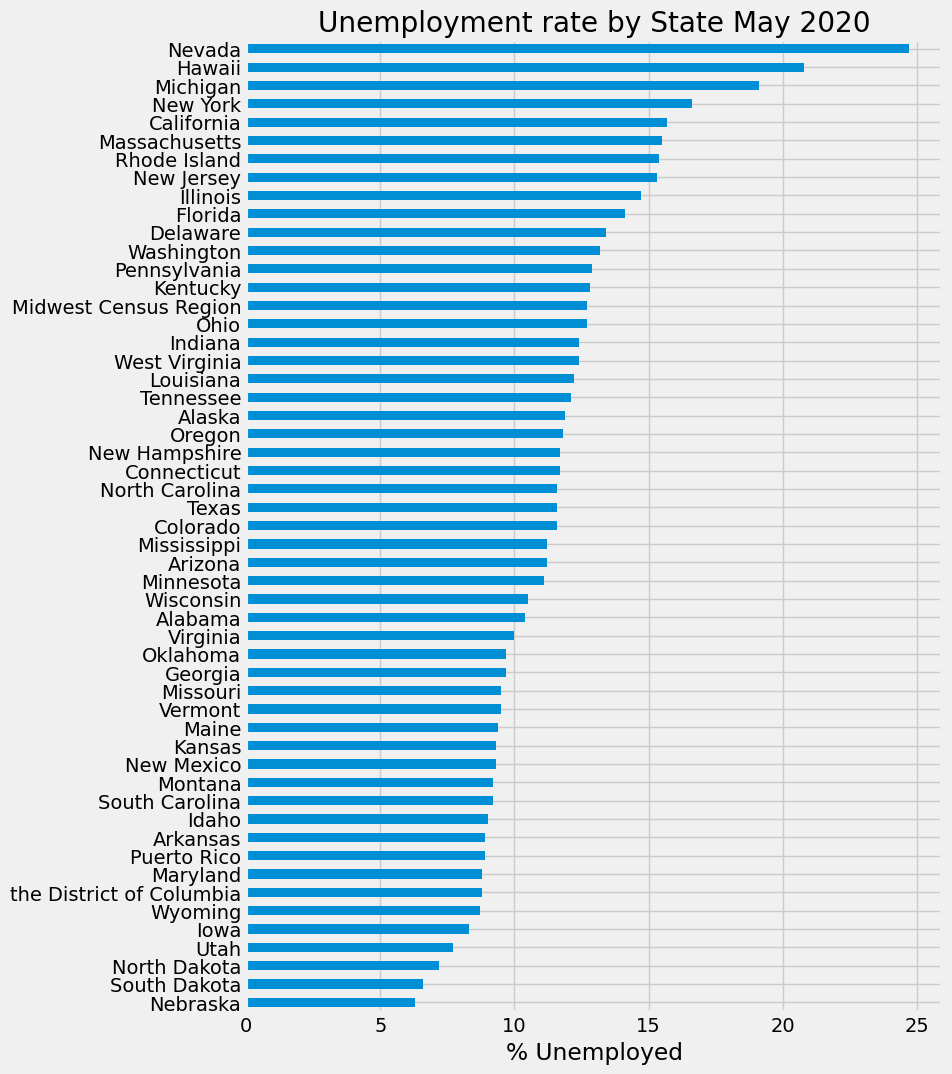

In [66]:
ax = unemp_state.loc[unemp_state.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), title='Unemployment rate by State May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

Another feature except unemployment rate is participation rate that is another indicator of who are participating in job market.

# Pull Participation Rate

In [67]:
df_part = fred.search('participation rate state', filter=('frequency','Monthly'))
df_part = df_part.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

part_id_to_state = df_part['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [68]:
part_all_result =[]

for id in df_part.index:
    result = fred.get_series(id)
    result = result.to_frame(name = id)
    part_all_result.append(result)

In [69]:
part_state = pd.concat(part_all_result, axis=1).drop(['CIVPART','LNS11300060','LNS11300002','LNS11300001','LNS11324230','LNS11300012',
                                                      'LNS11300036','LNS11300006','LRAC25MAUSM156S','LRAC25FEUSM156S','LNS11327662',
                                                      'LNS11300028','LNS11327660','LNS11300031','LNS11300003','LNS11300009',
                                                      'LNS11300026','LRIN64TTUSM156S','LNS11300032','LRAC64TTUSM156S','LNS11300025',
                                                      'LNS11300029','LNS11327659','LNS11327689','LRAC55TTUSM156S','LRAC24TTUSM156S',
                                                      'LNS11300015','LNS11300018','LRIN55TTUSM156S','LRIN25MAUSM156S','LRAC55FEUSM156S',
                                                      'LRAC24MAUSM156S','LRAC24FEUSM156S','LRAC55MAUSM156S','LRAC74MAUSM156S',
                                                      'LRIN24MAUSM156S','LRAC74FEUSM156S','LRIN55FEUSM156S','LRIN55MAUSM156S',
                                                      'LRIN74FEUSM156S','LRIN24FEUSM156S','LRIN74MAUSM156S','LRAC64FEUSM156S',
                                                      'LRAC64MAUSM156S','LRIN64MAUSM156S','LRIN25FEUSM156S','LRAC25TTUSM156S',
                                                      'LRAC74TTUSM156S','LRIN25TTUSM156S','LRACTTMAUSM156S','LRINTTFEUSM156S',
                                                      'LRINTTMAUSM156S','LRACTTFEUSM156S','LRIN24TTUSM156S','LRINTTTTUSM156S',
                                                      'LRACTTTTUSM156S','LRIN64FEUSM156S','LRIN74TTUSM156S'],axis=1)

In [70]:
part_state.columns = [part_id_to_state[d] for d in part_state.columns]

participation code is similar to unemployment code

# Plot Unemployment vs Participation

In [71]:
unemp_state = unemp_state.drop(['the District of Columbia','Puerto Rico','Midwest Census Region'],axis=1)
unemp_state = unemp_state.reindex(sorted(unemp_state.columns), axis=1)

In [72]:
unemp_state

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1976-01-01,6.6,7.1,10.2,7.3,9.2,5.8,9.8,8.0,9.7,8.4,9.8,5.6,6.6,6.6,4.3,4.2,5.6,6.3,8.7,6.4,10.5,9.9,6.0,6.7,5.9,5.8,3.3,9.2,6.5,10.3,8.6,10.3,6.4,3.4,8.1,5.8,9.5,8.0,7.8,7.4,3.3,6.0,5.8,5.8,8.6,6.1,8.5,7.5,5.8,4.1
1976-02-01,6.6,7.1,10.2,7.3,9.2,5.7,9.8,8.0,9.7,8.4,9.8,5.6,6.6,6.6,4.3,4.2,5.6,6.3,8.7,6.4,10.5,9.9,6.0,6.7,5.9,5.8,3.3,9.2,6.5,10.3,8.7,10.3,6.4,3.4,8.1,5.8,9.5,8.1,7.8,7.4,3.3,6.0,5.8,5.9,8.6,6.1,8.5,7.5,5.8,4.1
1976-03-01,6.6,7.0,10.1,7.3,9.1,5.7,9.8,8.0,9.6,8.4,9.8,5.6,6.6,6.5,4.3,4.2,5.6,6.3,8.6,6.4,10.5,9.9,5.9,6.6,5.9,5.8,3.3,9.2,6.5,10.3,8.7,10.2,6.4,3.4,8.1,5.8,9.4,8.1,7.7,7.3,3.2,6.0,5.9,5.8,8.6,6.1,8.4,7.5,5.7,4.1
1976-04-01,6.5,6.9,10.0,7.2,9.1,5.6,9.6,8.1,9.5,8.3,9.7,5.6,6.6,6.3,4.2,4.2,5.6,6.4,8.6,6.4,10.3,9.8,5.8,6.4,6.0,5.8,3.2,9.0,6.5,10.3,8.6,10.2,6.3,3.5,8.0,5.8,9.2,8.1,7.7,7.2,3.1,6.0,5.9,5.8,8.6,6.0,8.5,7.5,5.6,4.0
1976-05-01,6.4,6.9,9.8,7.1,9.0,5.6,9.4,8.3,9.3,8.1,9.4,5.6,6.6,6.0,4.1,4.2,5.5,6.5,8.5,6.5,10.1,9.6,5.7,6.3,6.0,5.8,3.1,8.9,6.5,10.3,8.6,10.1,6.1,3.6,7.8,5.7,9.1,8.1,7.7,7.0,3.1,5.9,5.9,5.7,8.5,5.9,8.5,7.4,5.5,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,2.3,3.7,3.5,3.0,4.4,2.8,3.9,4.4,2.6,3.1,3.5,2.6,4.4,3.1,2.8,2.9,3.8,3.6,2.6,2.7,3.5,4.1,2.8,3.5,2.5,2.3,2.1,5.5,2.4,3.5,3.5,4.1,3.5,2.1,3.8,3.0,4.4,4.2,3.1,3.2,1.9,3.4,4.0,2.4,2.7,3.2,4.5,3.4,2.5,3.7
2023-04-01,2.2,3.7,3.4,2.8,4.5,2.8,3.8,4.3,2.6,3.1,3.3,2.6,4.2,3.0,2.7,2.9,3.7,3.6,2.4,2.5,3.1,3.8,2.8,3.4,2.5,2.3,2.0,5.4,2.1,3.5,3.5,4.0,3.4,2.1,3.7,2.9,4.0,4.1,3.0,3.1,1.9,3.3,4.0,2.3,2.4,3.1,4.3,3.3,2.4,3.5
2023-05-01,2.2,3.6,3.4,2.7,4.5,2.8,3.7,4.2,2.6,3.2,3.1,2.6,4.1,3.1,2.7,2.9,3.8,3.6,2.4,2.4,2.8,3.7,2.9,3.2,2.5,2.3,1.9,5.4,1.9,3.6,3.5,3.9,3.4,2.1,3.6,2.8,3.7,4.0,3.0,3.1,1.9,3.3,4.1,2.3,2.1,2.9,4.1,3.3,2.4,3.3
2023-06-01,2.2,3.7,3.5,2.6,4.6,2.8,3.7,4.2,2.6,3.2,3.0,2.7,4.0,3.2,2.7,2.8,3.8,3.6,2.4,2.0,2.6,3.6,2.9,3.1,2.6,2.4,1.9,5.4,1.8,3.7,3.5,3.9,3.3,2.0,3.4,2.7,3.5,3.8,2.9,3.1,1.8,3.2,4.1,2.4,1.9,2.7,3.8,3.3,2.5,3.1


In [73]:
part_state = part_state.drop(['District Of Columbia'],axis=1)
part_state = part_state.reindex(sorted(part_state.columns), axis=1)

In [76]:
part_state = part_state.dropna()
      

In [77]:
part_state

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1976-01-01,57.0,69.0,59.5,57.9,62.6,67.2,64.2,62.7,55.8,63.7,69.9,63.0,63.0,64.0,64.4,65.1,60.5,56.8,62.1,64.3,64.8,61.6,65.6,58.8,60.5,62.7,64.9,71.3,65.9,61.5,60.8,58.0,66.5,62.6,61.7,59.3,62.9,58.4,63.8,65.3,64.6,59.6,63.8,62.8,63.6,65.9,60.9,52.5,65.6,65.3
1976-02-01,56.9,68.4,59.2,57.8,62.4,67.0,64.1,62.5,55.7,63.6,69.6,62.8,63.0,63.9,64.3,65.0,60.3,56.6,61.9,64.2,64.7,61.5,65.5,58.6,60.3,62.5,64.9,70.8,65.6,61.4,60.5,58.0,66.3,62.4,61.7,59.2,62.7,58.3,63.7,65.2,64.4,59.4,63.5,62.6,63.4,65.8,60.7,52.4,65.5,64.9
1976-03-01,56.8,67.8,59.1,57.7,62.2,66.8,64.0,62.5,55.5,63.5,69.6,62.7,62.9,63.8,64.2,64.9,60.2,56.5,61.9,64.1,64.6,61.5,65.4,58.5,60.3,62.4,64.8,70.5,65.6,61.4,60.3,58.0,66.2,62.3,61.7,59.1,62.5,58.3,63.6,65.0,64.4,59.3,63.4,62.5,63.2,65.6,60.6,52.3,65.4,64.7
1976-04-01,56.8,67.9,59.1,57.7,62.2,66.6,64.1,62.4,55.5,63.5,69.4,62.7,62.9,63.8,64.1,65.0,60.1,56.4,61.8,64.1,64.6,61.6,65.4,58.5,60.4,62.3,64.8,70.4,65.7,61.5,60.3,58.0,66.2,62.5,61.6,59.0,62.4,58.3,63.7,64.9,64.3,59.3,63.5,62.5,63.5,65.5,60.6,52.3,65.4,64.9
1976-05-01,56.8,67.9,59.1,57.7,62.3,66.5,64.3,62.4,55.4,63.6,69.3,62.8,63.0,63.9,64.1,65.1,60.1,56.4,61.7,64.1,64.6,61.7,65.5,58.5,60.6,62.2,64.8,70.5,66.0,61.6,60.3,58.1,66.3,62.6,61.6,59.0,62.5,58.3,63.6,64.7,64.3,59.4,63.6,62.6,63.6,65.4,60.7,52.2,65.5,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,56.7,65.3,61.6,57.4,62.3,68.5,64.5,59.7,59.3,61.1,60.4,62.6,64.7,63.5,68.2,66.6,57.5,59.3,58.0,64.9,65.0,59.9,68.0,54.4,62.9,62.6,69.5,61.4,65.8,64.8,56.7,60.7,60.4,69.3,61.5,61.0,62.7,62.0,62.9,56.1,67.5,59.0,63.9,68.9,63.7,65.9,64.6,54.6,64.6,64.3
2023-04-01,56.8,65.3,61.6,57.5,62.4,68.6,64.3,59.8,59.3,61.2,60.4,62.5,64.8,63.6,68.3,66.7,57.6,59.5,58.1,65.1,64.8,60.2,68.1,54.5,63.2,62.7,69.5,61.4,65.6,65.0,56.8,60.8,60.5,69.6,61.8,61.1,62.4,62.0,62.9,56.3,67.7,59.1,64.1,69.1,63.7,66.2,64.7,54.6,64.8,64.5
2023-05-01,56.9,65.3,61.7,57.5,62.5,68.7,64.2,59.9,59.4,61.3,60.4,62.5,64.7,63.6,68.5,66.8,57.7,59.6,58.3,65.3,64.7,60.5,68.2,54.6,63.4,62.8,69.5,61.5,65.3,65.2,56.9,61.0,60.6,69.7,62.1,61.3,62.2,62.0,63.1,56.5,67.8,59.2,64.2,69.4,63.7,66.5,64.8,54.6,65.1,64.6
2023-06-01,57.0,65.3,61.7,57.6,62.5,68.7,64.1,60.0,59.5,61.3,60.4,62.5,64.6,63.6,68.7,66.8,57.8,59.5,58.4,65.3,64.6,60.7,68.4,54.5,63.6,62.8,69.5,61.5,65.2,65.4,57.0,61.2,60.7,69.7,62.2,61.4,62.0,62.0,63.2,56.7,67.9,59.3,64.2,69.6,63.8,66.6,64.7,54.6,65.3,64.6


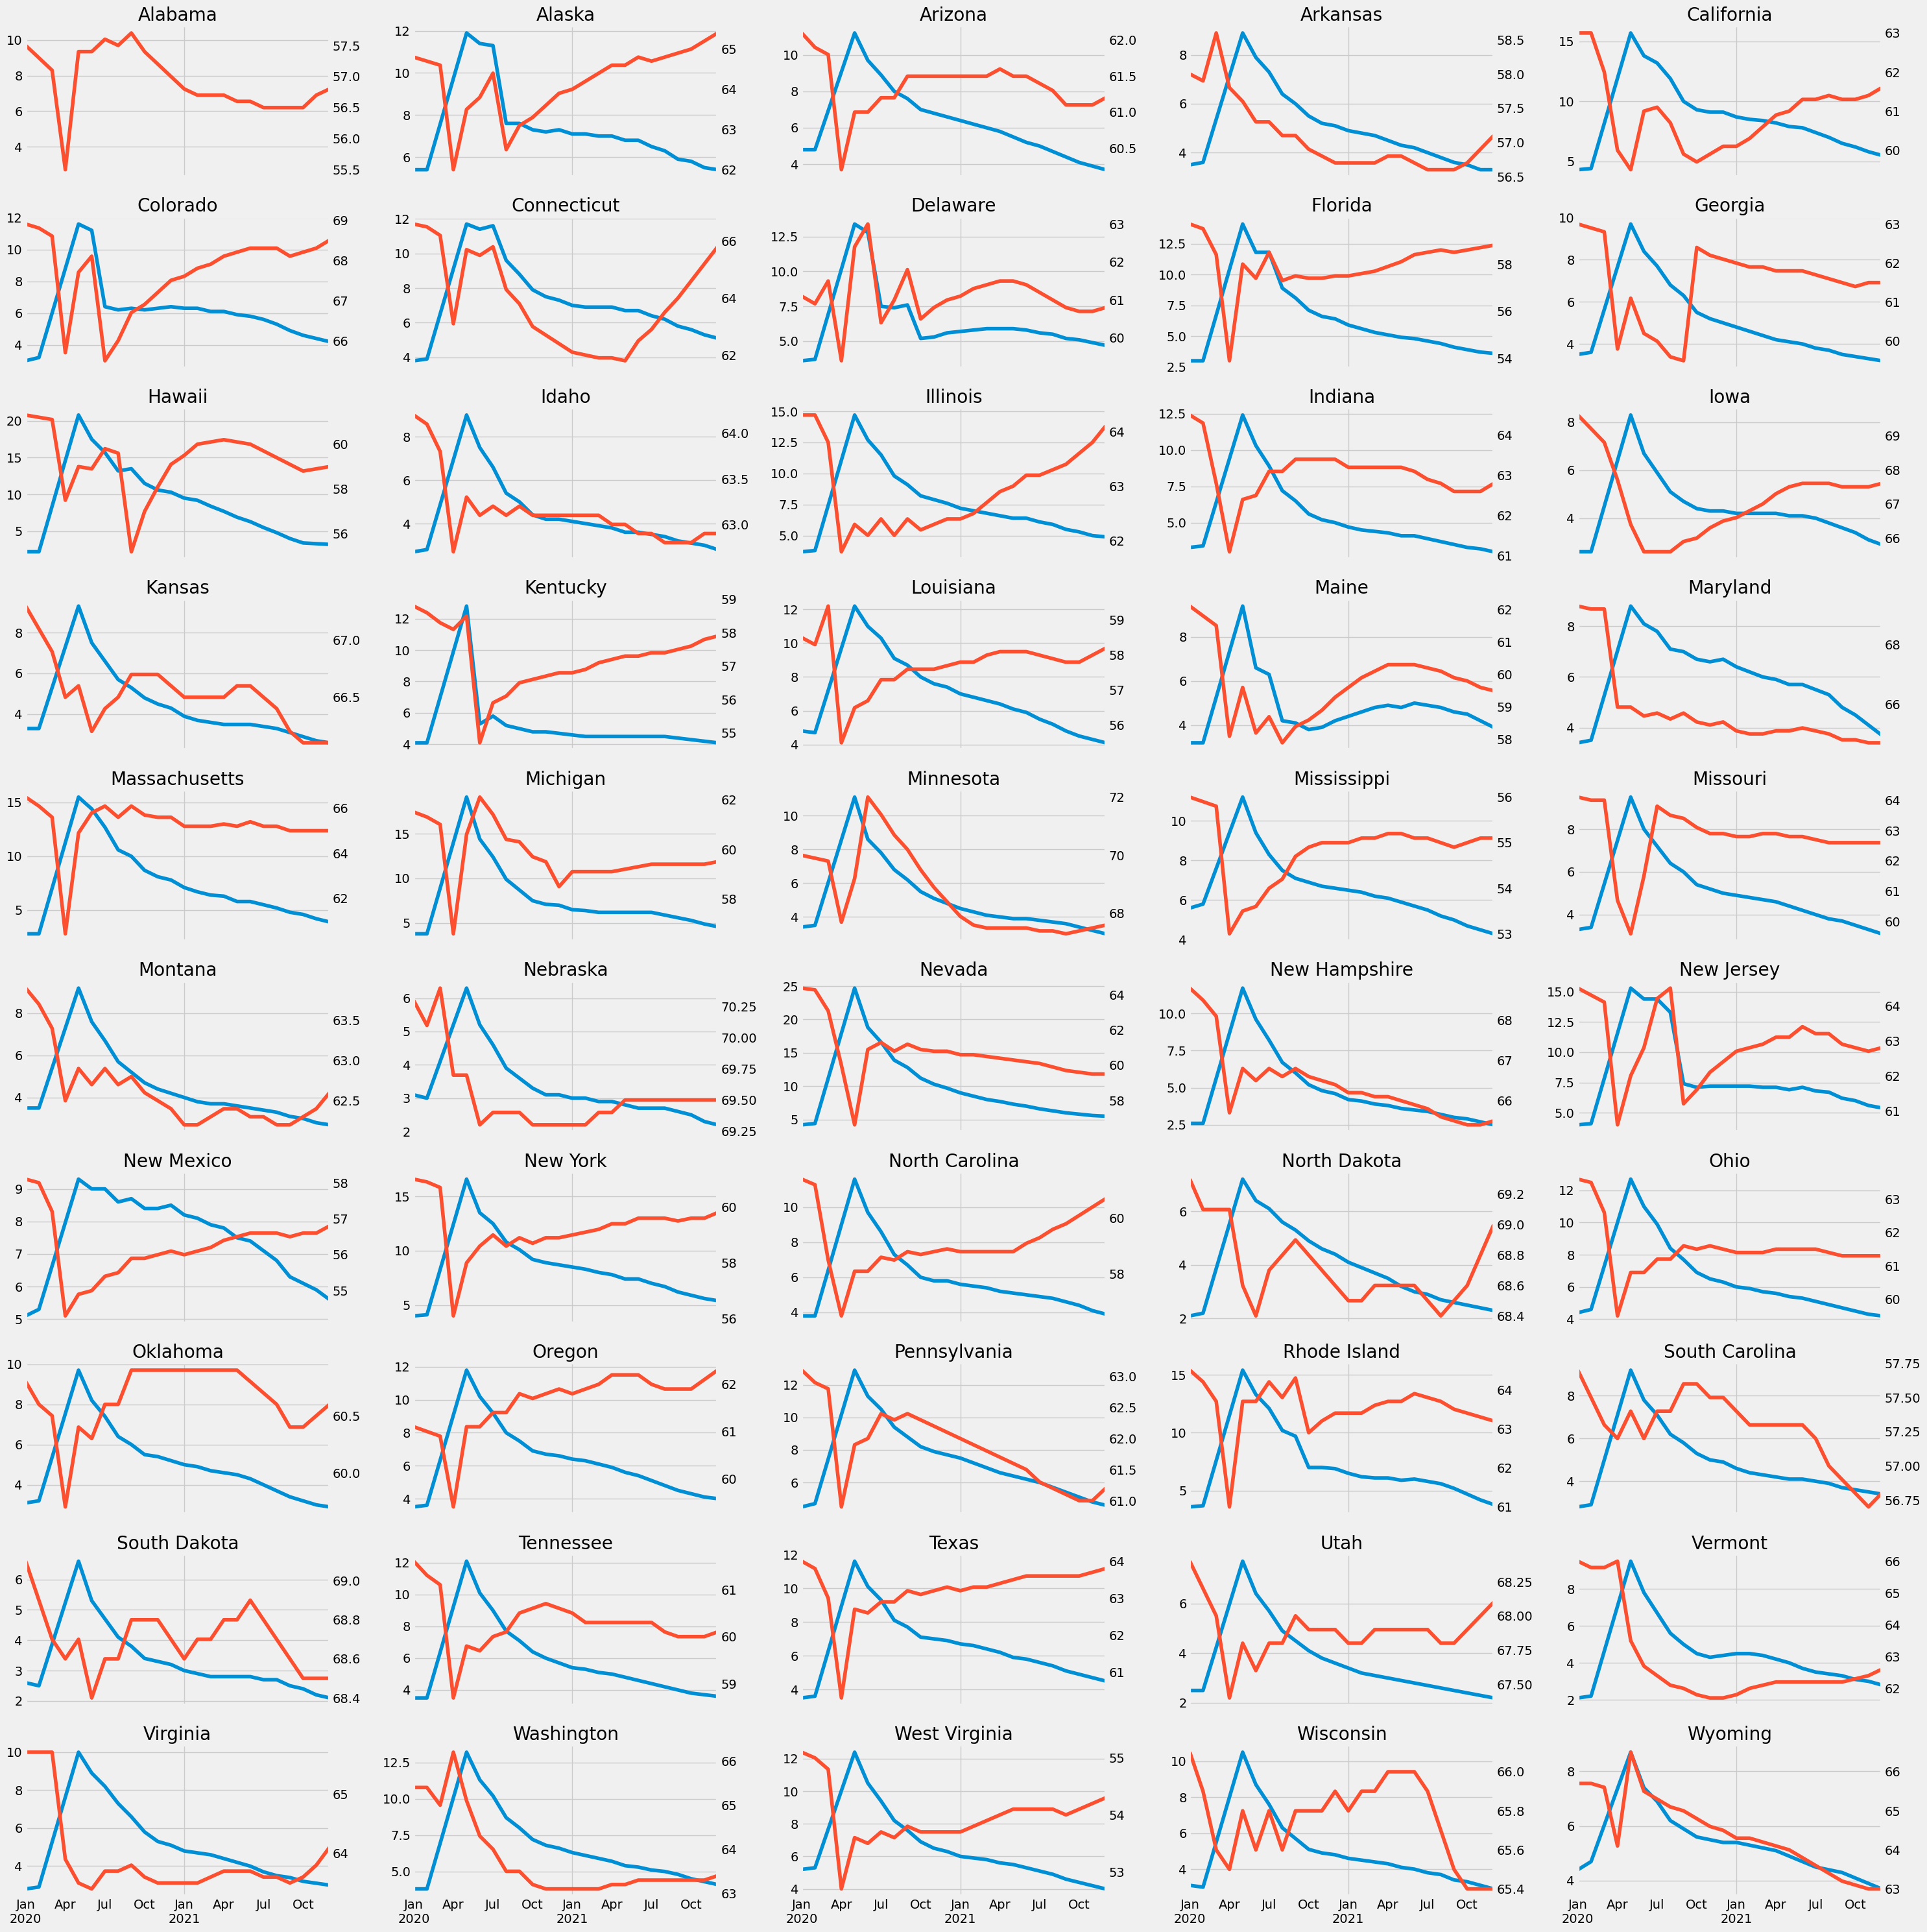

In [81]:
fig,axs = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i=0
for state in unemp_state.columns:
    ax2 = axs[i].twinx()
    unemp_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label = 'Unemployment')
    part_state.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=ax2, label = 'Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()
    

so here we can see every state with unemployment rate and participation rate effected over 2020 and 2021. Also each state have its own profile and might explore why some state finding are different from others.

# future work

Find the state with where unemployment rate and participation rate are not match like "south carolina", "Missouri" etc. and find insight of it.

Perform more EDA